In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Load the dataset
file_path = 'Crop_recommendation.csv.xls'
crop_recom_data = pd.read_csv(file_path)

# Null value check
crop_recom_null_values = crop_recom_data.isnull().sum()

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_columns = crop_recom_data.select_dtypes(include=['float64', 'int64']).columns
crop_recom_outliers = {column: detect_outliers_iqr(crop_recom_data, column) for column in numerical_columns}

# Removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

crop_recom_cleaned_data = crop_recom_data.copy()
for column in numerical_columns:
    crop_recom_cleaned_data = remove_outliers(crop_recom_cleaned_data, column)

crop_recom_summary = crop_recom_cleaned_data.describe()

In [3]:
crop_recom_null_values = crop_recom_data.isnull().sum()


def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

crop_recom_outliers = {}
numerical_columns = crop_recom_data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    crop_recom_outliers[column] = detect_outliers_iqr(crop_recom_data, column)


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

crop_recom_cleaned_data = crop_recom_data.copy()
for column in numerical_columns:
    crop_recom_cleaned_data = remove_outliers(crop_recom_cleaned_data, column)


crop_recom_summary = crop_recom_cleaned_data.describe()

# Display null values, outliers, and summary statistics
crop_recom_null_values, {k: len(v) for k, v in crop_recom_outliers.items()}, crop_recom_summary

(N              0
 P              0
 K              0
 temperature    0
 humidity       0
 ph             0
 rainfall       0
 label          0
 dtype: int64,
 {'N': 0,
  'P': 138,
  'K': 200,
  'temperature': 86,
  'humidity': 30,
  'ph': 57,
  'rainfall': 100},
                  N            P            K  temperature     humidity  \
 count  1846.000000  1846.000000  1846.000000  1846.000000  1846.000000   
 mean     54.210184    45.161430    32.745937    25.711188    69.770583   
 std      37.928591    22.506246    16.614550     4.155121    22.649324   
 min       0.000000     5.000000     5.000000    15.330426    14.258040   
 25%      22.000000    25.000000    20.000000    23.267408    57.749008   
 50%      40.000000    46.000000    28.000000    25.839646    77.331406   
 75%      89.000000    63.000000    45.000000    28.518889    88.288685   
 max     140.000000    95.000000    85.000000    36.750875    99.981876   
 
                 ph     rainfall  
 count  1846.000000  184

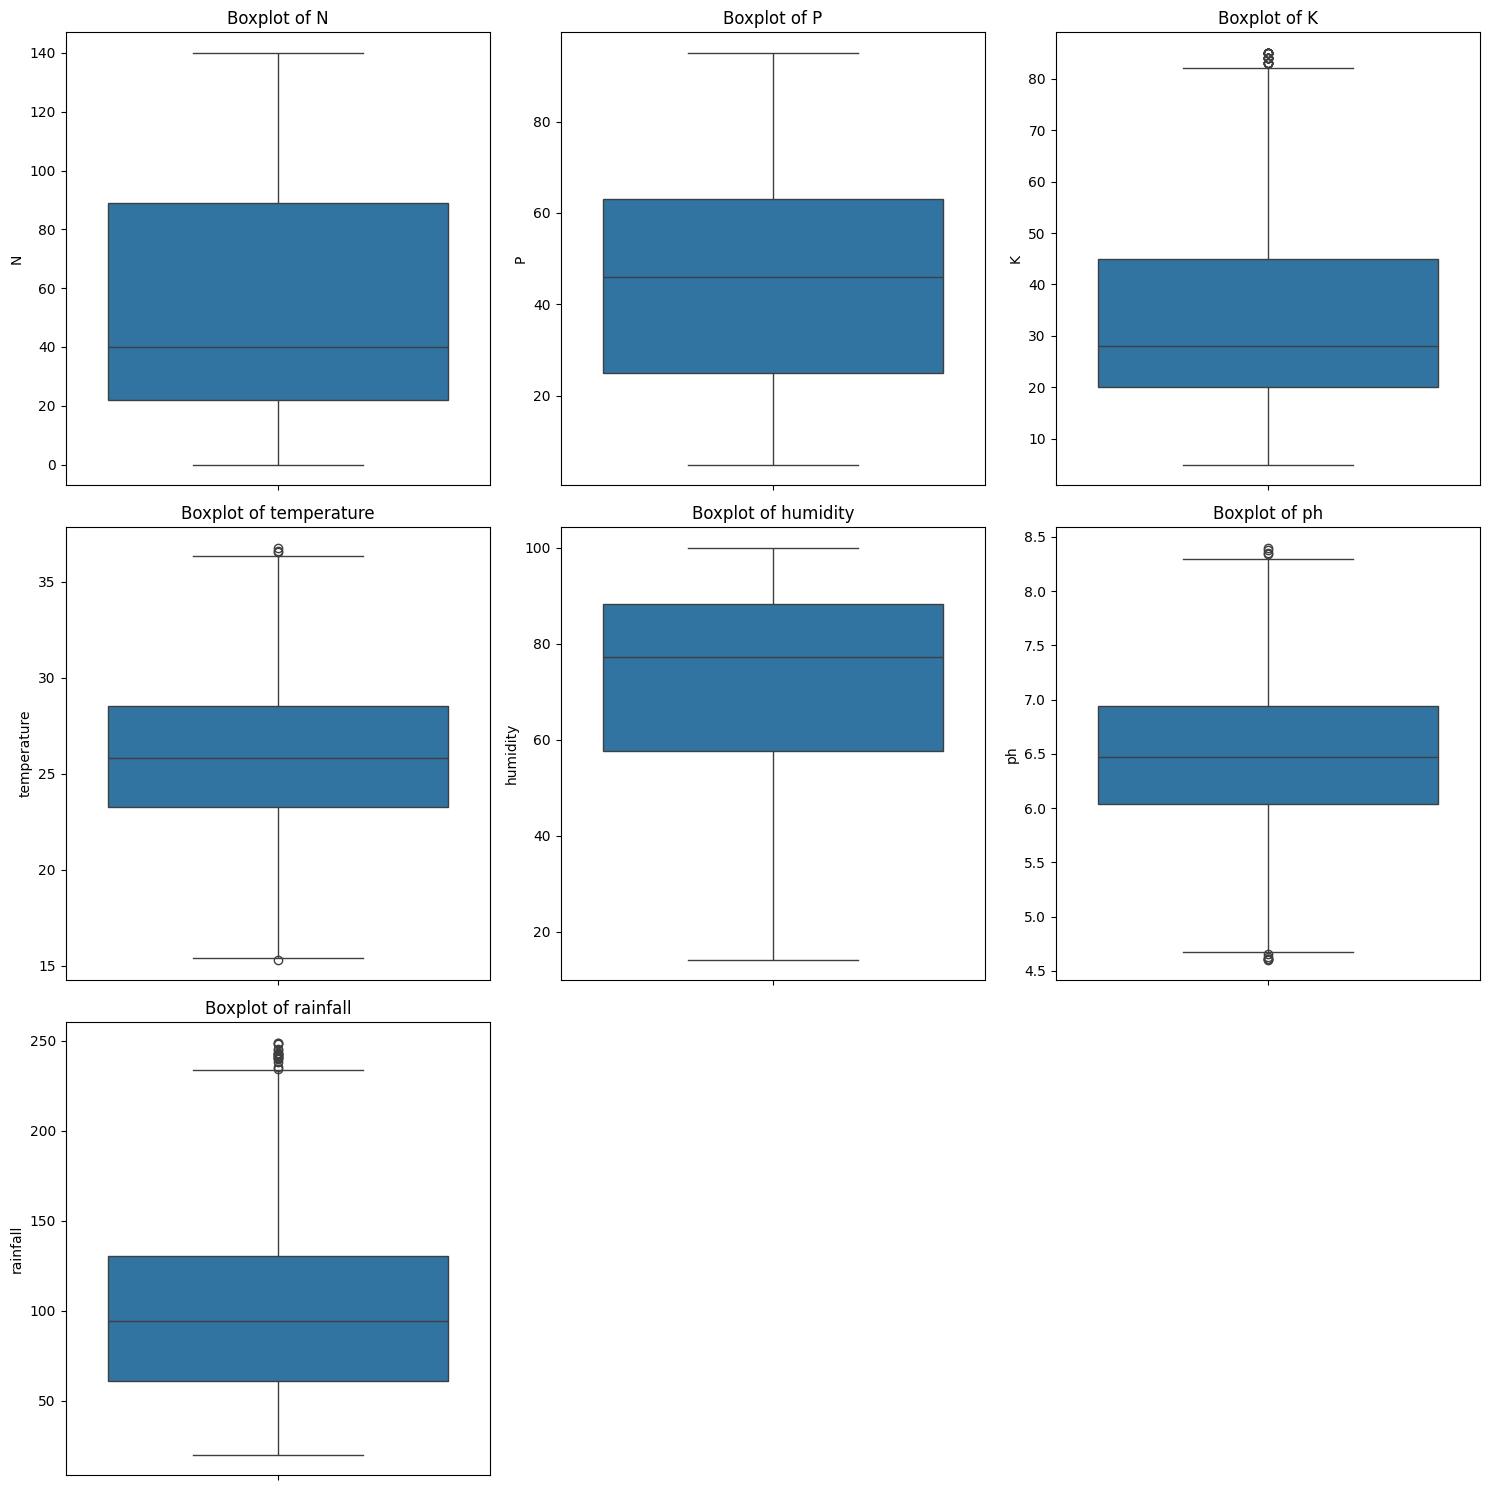

In [4]:
num_columns = len(numerical_columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)

plt.figure(figsize=(15, 5 * rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=crop_recom_cleaned_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

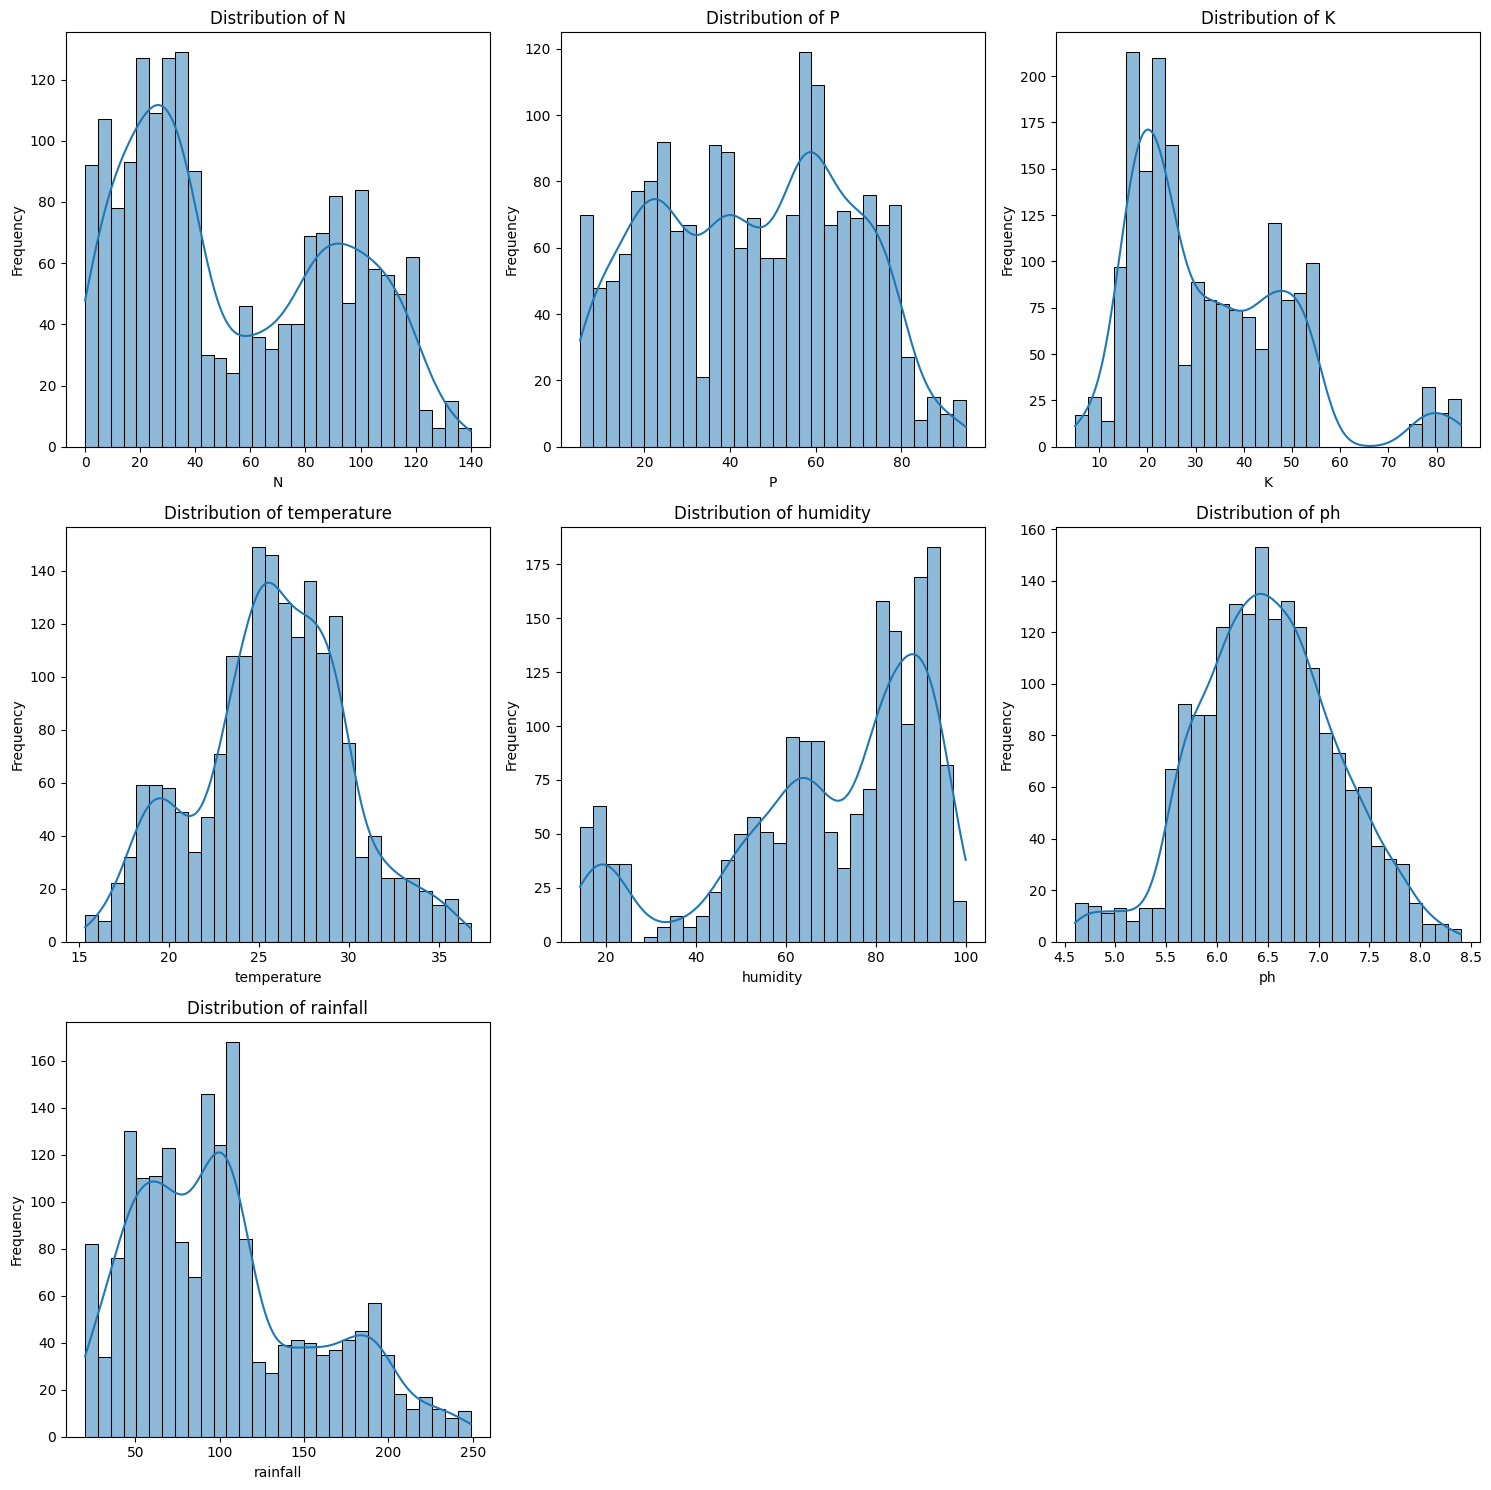

In [5]:
# Distribution plots for numerical features
plt.figure(figsize=(15, 5 * rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(crop_recom_cleaned_data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

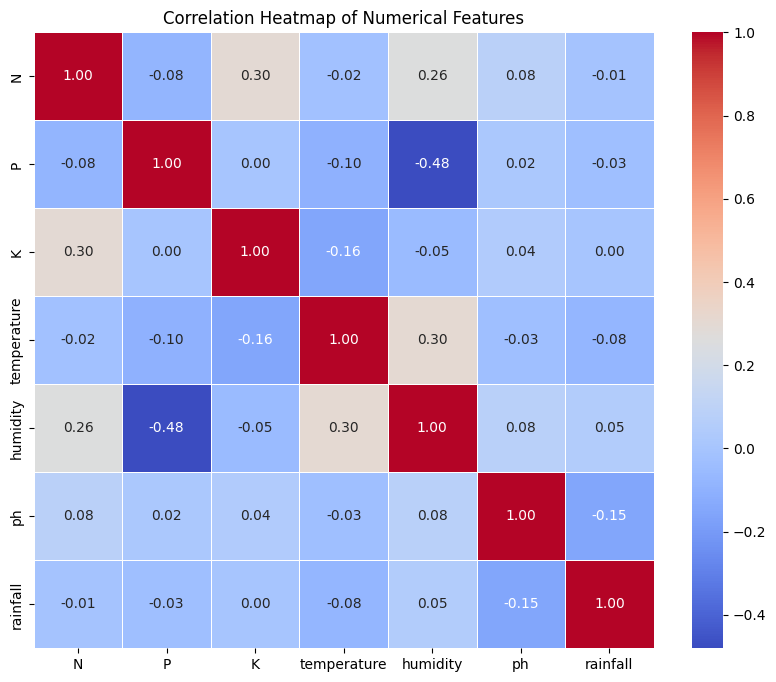

In [6]:


# Compute the correlation matrix for numeric columns only
crop_recom_corr = crop_recom_cleaned_data.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crop_recom_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

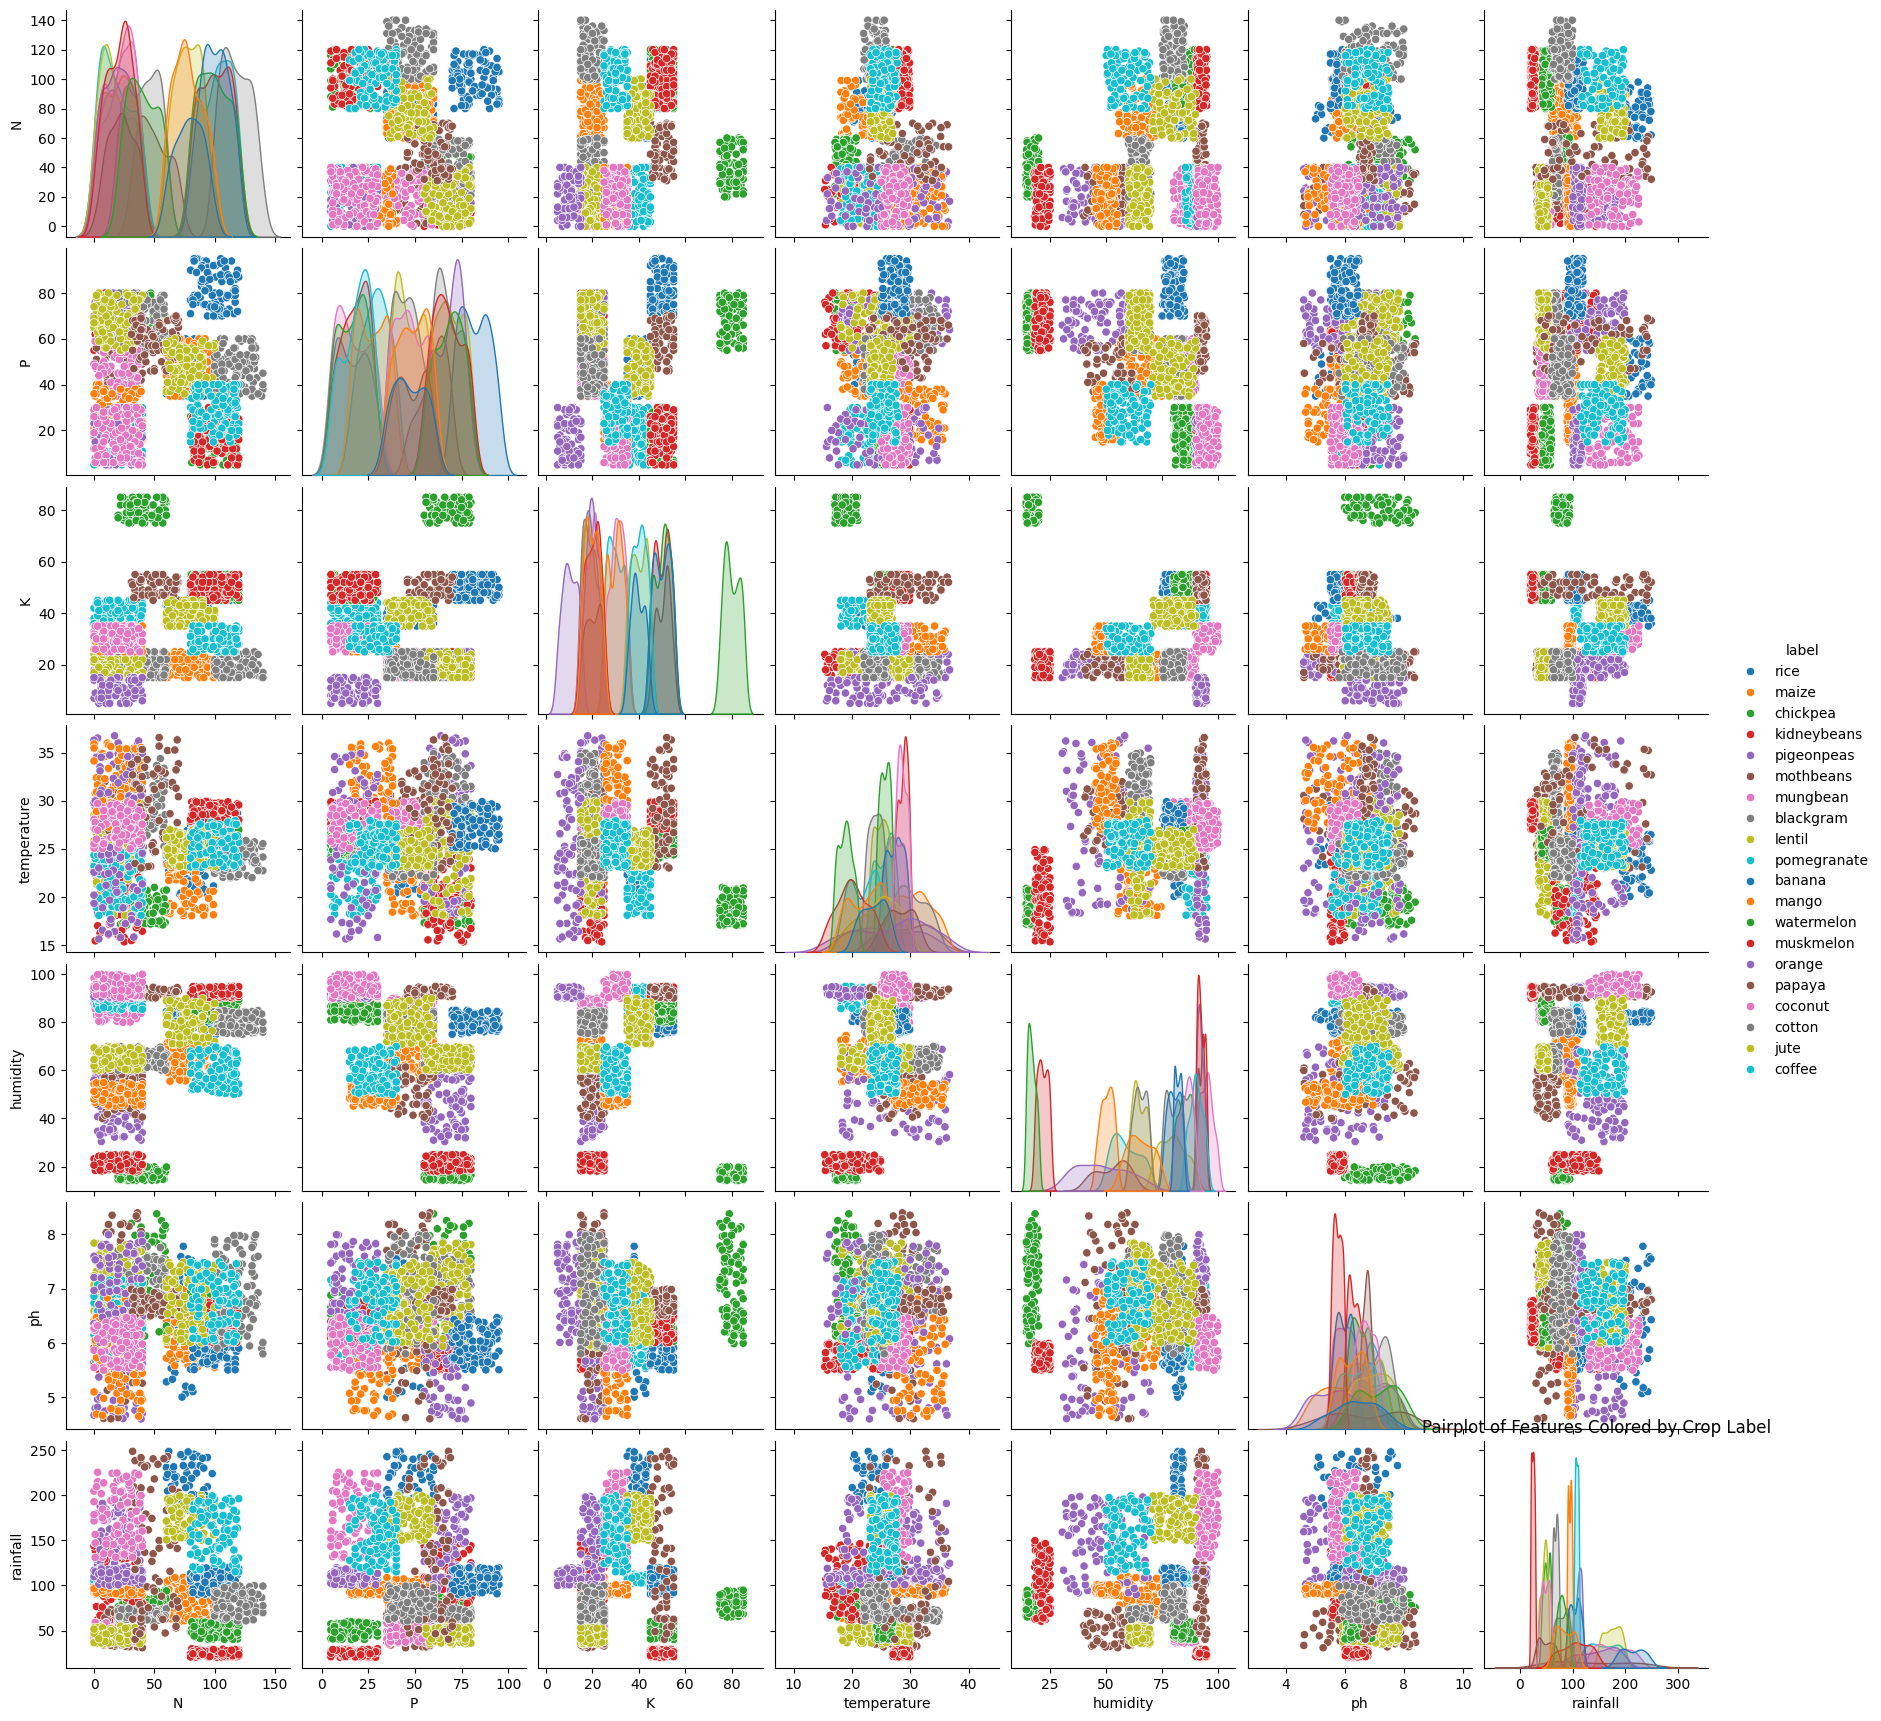

In [7]:
sns.pairplot(crop_recom_cleaned_data, hue='label', diag_kind='kde', palette='tab10')
plt.title('Pairplot of Features Colored by Crop Label')
plt.show()

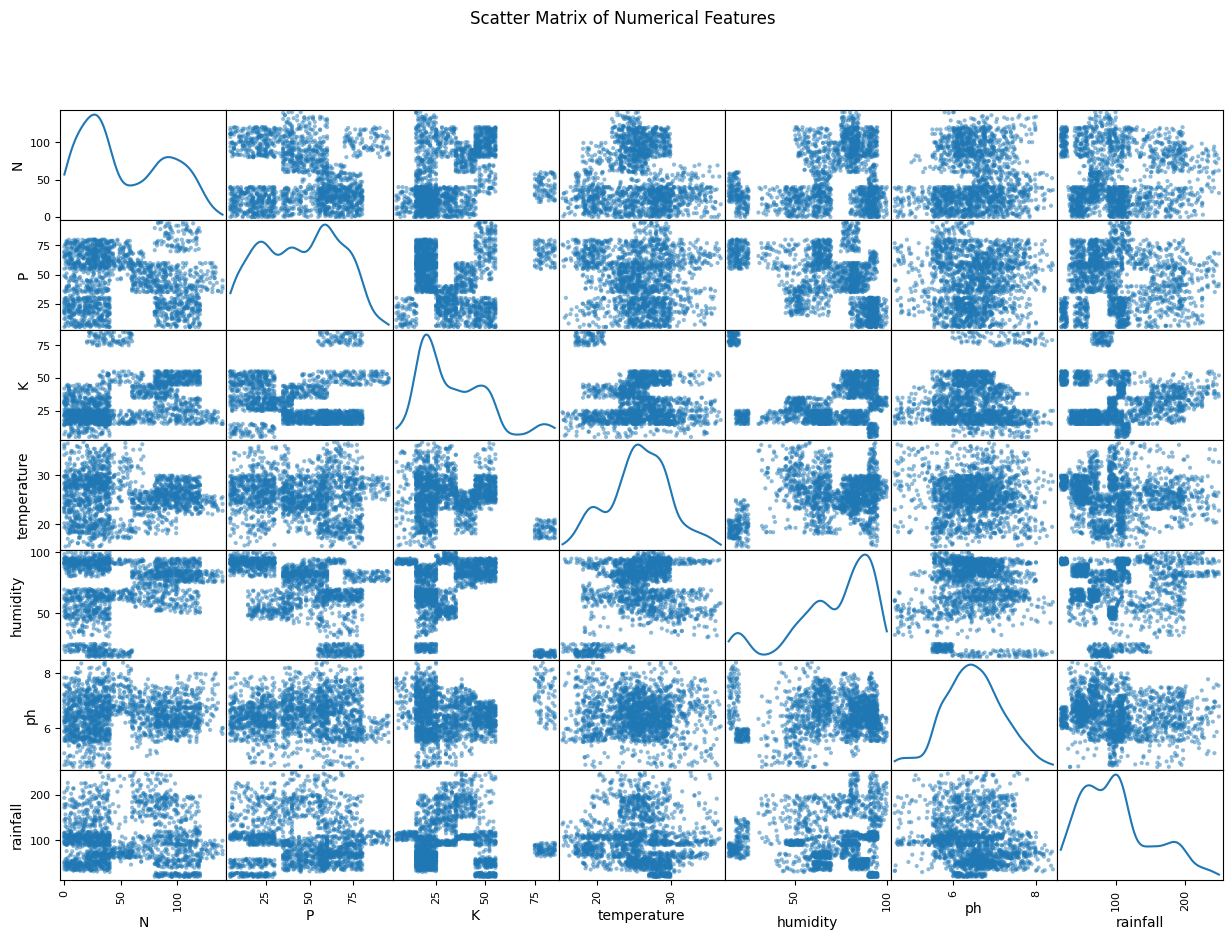

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(crop_recom_cleaned_data[numerical_columns], figsize=(15, 10), diagonal='kde', alpha=0.5)
plt.suptitle('Scatter Matrix of Numerical Features')
plt.show()

<ipython-input-9-8c725f9ba10d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=crop_recom_cleaned_data, palette='Set3')


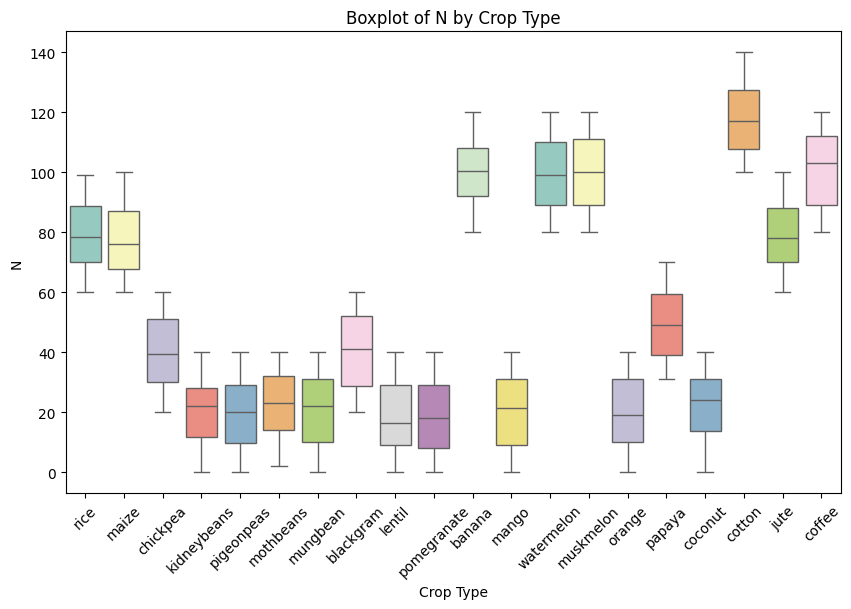

<ipython-input-9-8c725f9ba10d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=crop_recom_cleaned_data, palette='Set3')


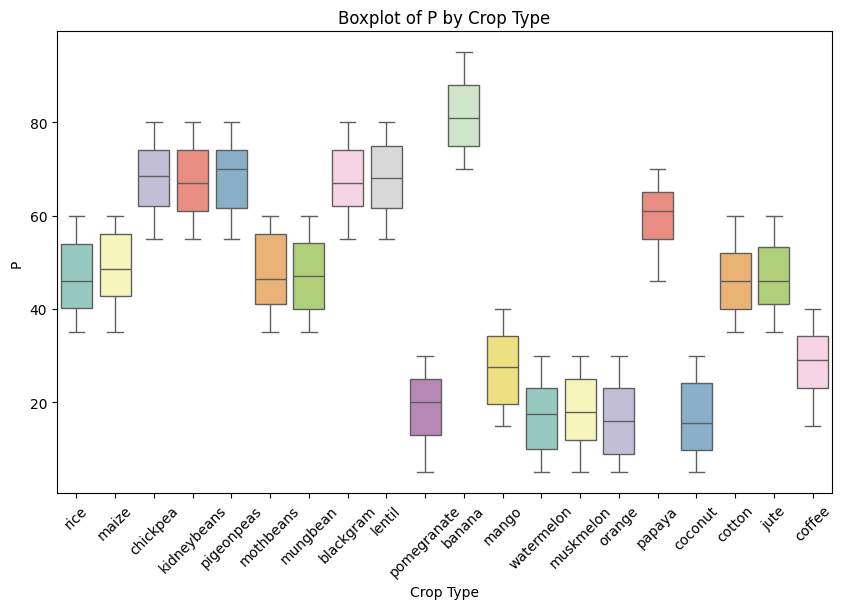

<ipython-input-9-8c725f9ba10d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=crop_recom_cleaned_data, palette='Set3')


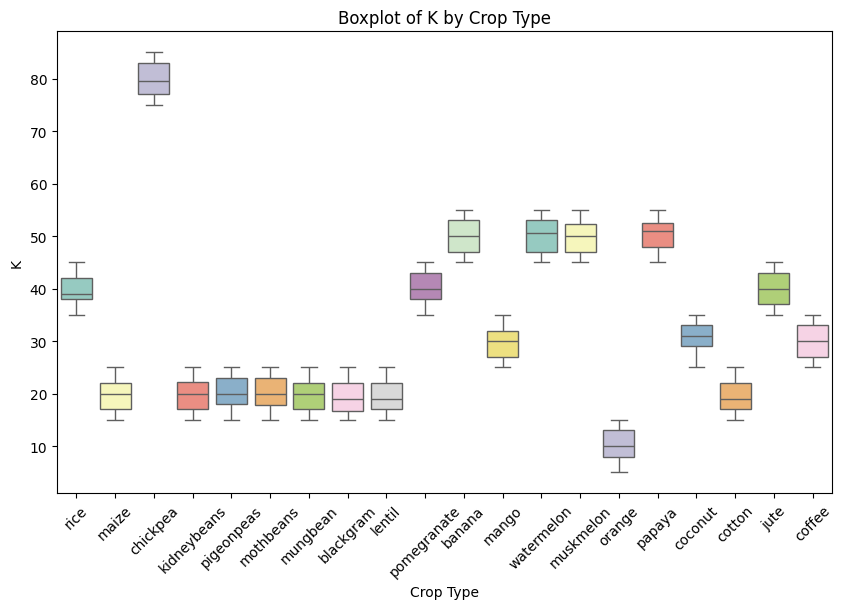

<ipython-input-9-8c725f9ba10d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=crop_recom_cleaned_data, palette='Set3')


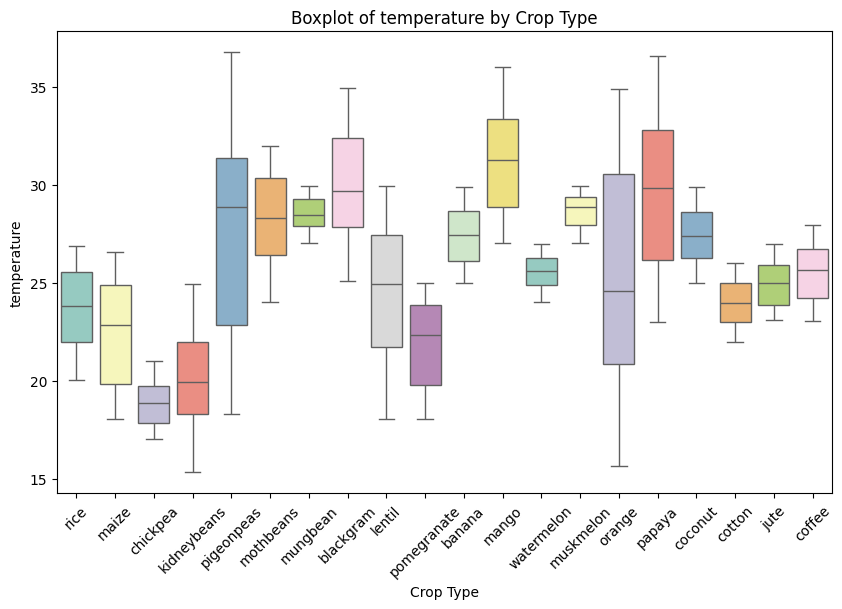

<ipython-input-9-8c725f9ba10d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=crop_recom_cleaned_data, palette='Set3')


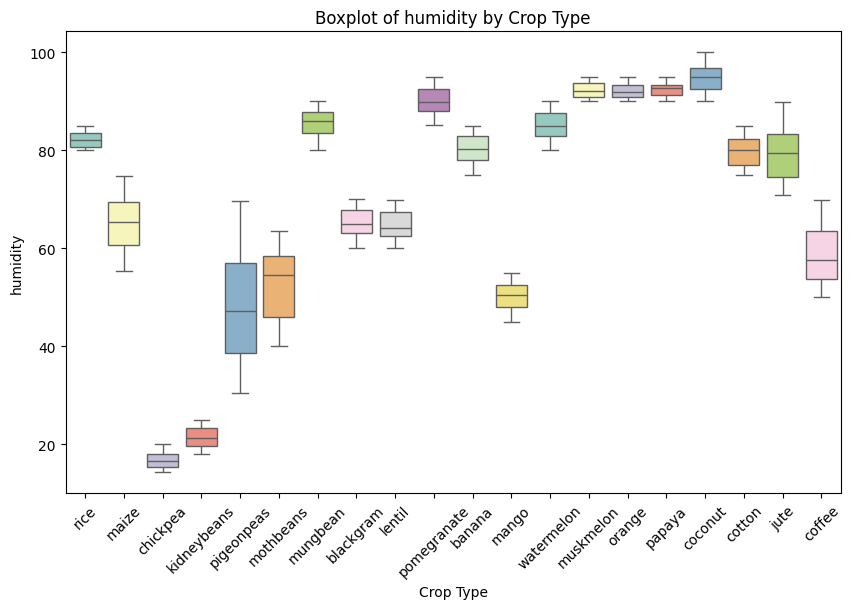

<ipython-input-9-8c725f9ba10d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=crop_recom_cleaned_data, palette='Set3')


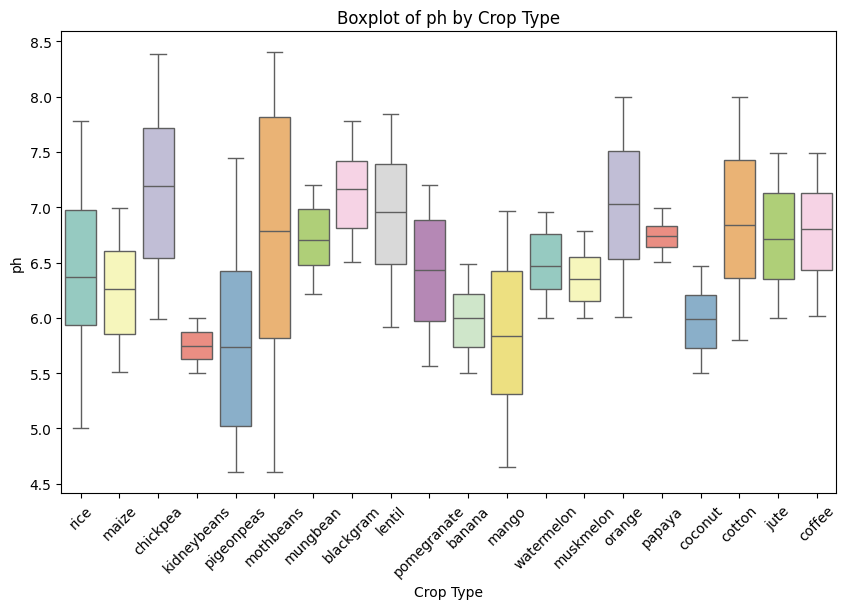

<ipython-input-9-8c725f9ba10d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=crop_recom_cleaned_data, palette='Set3')


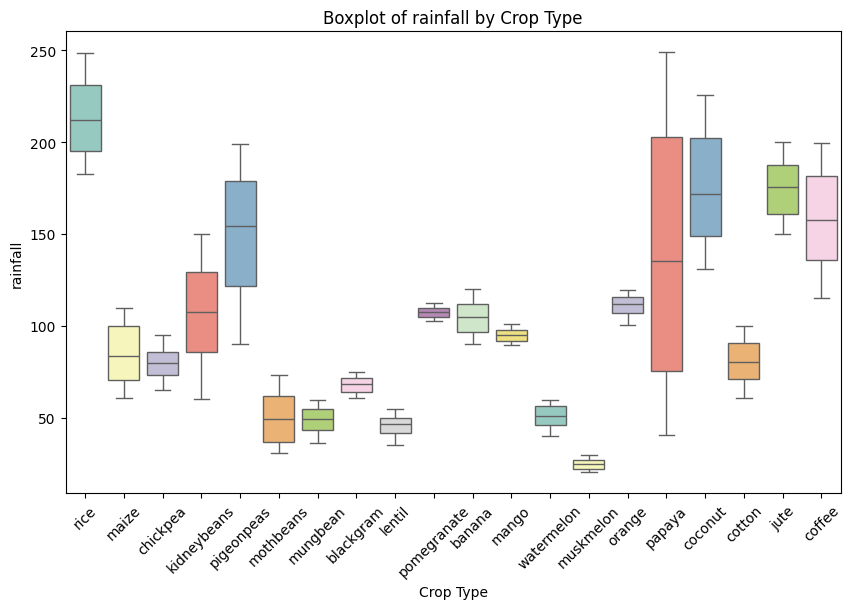

In [9]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=column, data=crop_recom_cleaned_data, palette='Set3')
    plt.title(f'Boxplot of {column} by Crop Type')
    plt.xlabel('Crop Type')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.show()

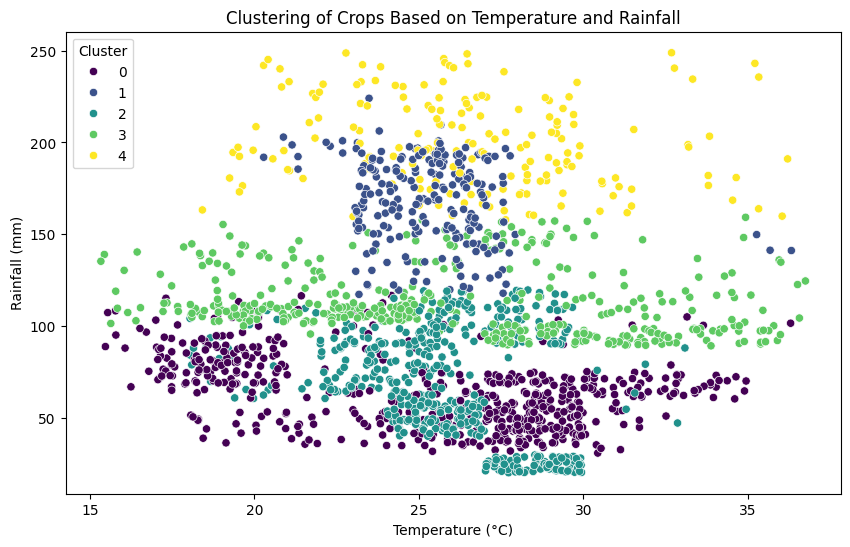

In [10]:
from sklearn.cluster import KMeans

# Applying k-Means clustering
X_cluster = crop_recom_cleaned_data[numerical_columns]
kmeans = KMeans(n_clusters=5, random_state=42)
crop_recom_cleaned_data['cluster'] = kmeans.fit_predict(X_cluster)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='rainfall', hue='cluster', data=crop_recom_cleaned_data, palette='viridis')
plt.title('Clustering of Crops Based on Temperature and Rainfall')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Cluster')
plt.show()

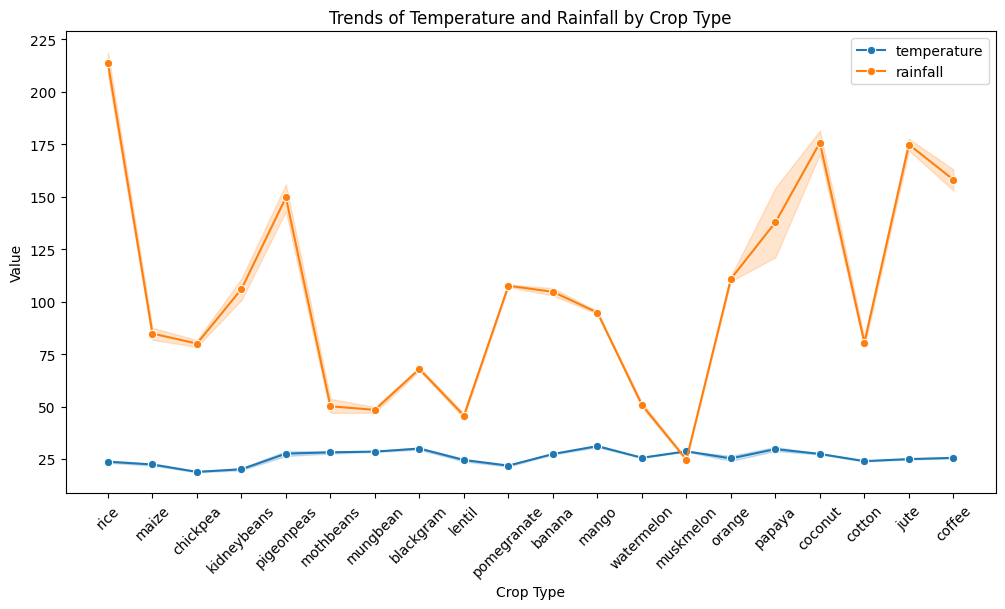

In [11]:
plt.figure(figsize=(12, 6))
for column in ['temperature', 'rainfall']:
    sns.lineplot(x='label', y=column, data=crop_recom_cleaned_data, marker='o', label=column)
plt.title('Trends of Temperature and Rainfall by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

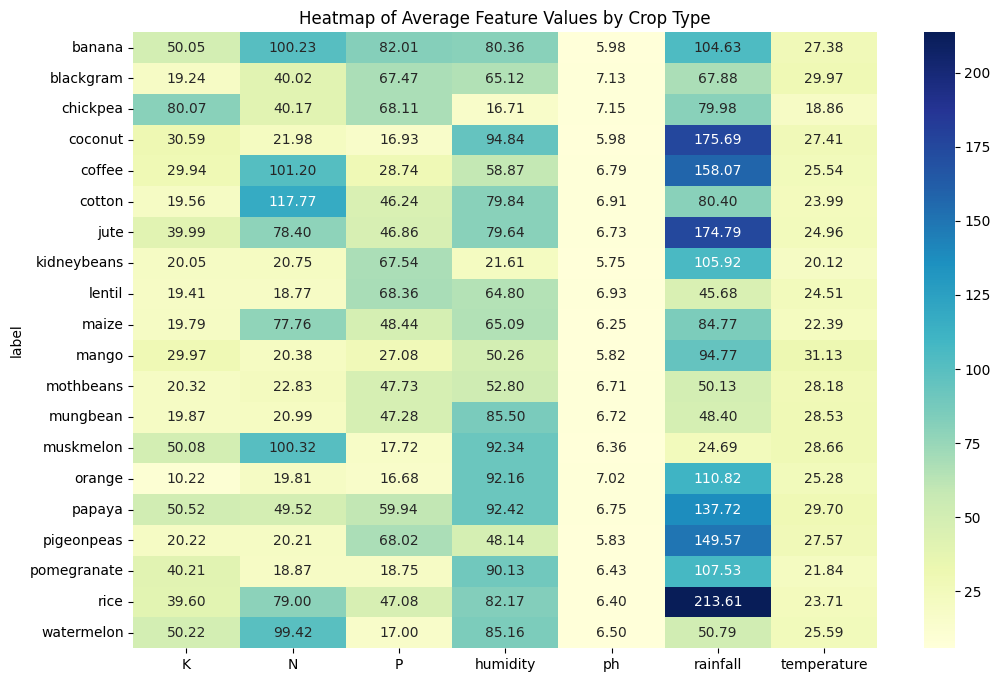

In [12]:
pivot_table = crop_recom_cleaned_data.pivot_table(index='label', values=numerical_columns, aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Average Feature Values by Crop Type')
plt.show()

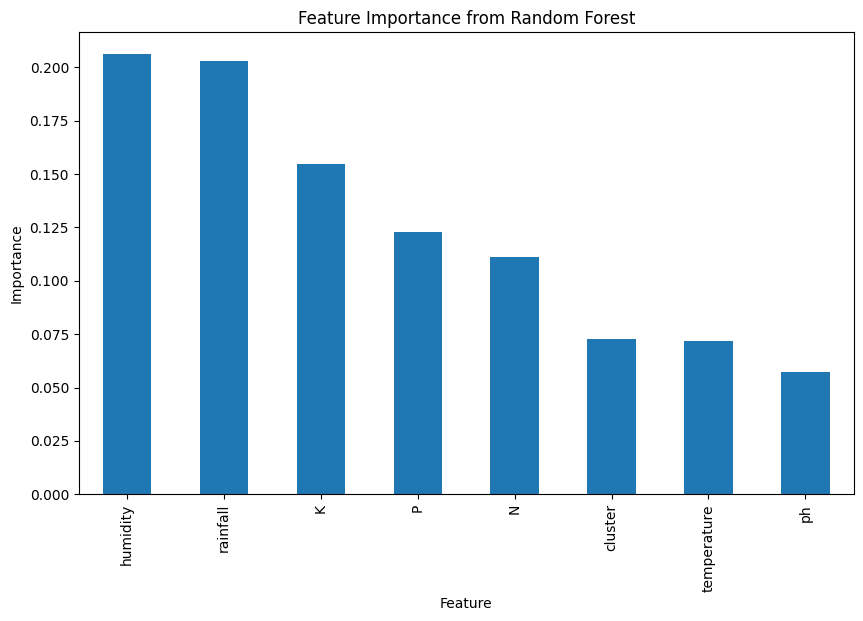

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
crop_recom_cleaned_data['encoded_label'] = label_encoder.fit_transform(crop_recom_cleaned_data['label'])

# Train a Random Forest Classifier
X = crop_recom_cleaned_data.drop(columns=['label', 'encoded_label'])
y = crop_recom_cleaned_data['encoded_label']
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Feature Importance Plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


comp_recom_label_encoder = LabelEncoder()
crop_recom_cleaned_data['encoded_label'] = comp_recom_label_encoder.fit_transform(crop_recom_cleaned_data['label'])

comp_recom_X = crop_recom_cleaned_data[numerical_columns]
comp_recom_y = crop_recom_cleaned_data['encoded_label']

# Standardize the features
comp_recom_scaler = StandardScaler()
comp_recom_X_scaled = comp_recom_scaler.fit_transform(comp_recom_X)

# Split into training and testing sets
comp_recom_X_train, comp_recom_X_test, comp_recom_y_train, comp_recom_y_test = train_test_split(
    comp_recom_X_scaled, comp_recom_y, test_size=0.3, random_state=42
)

print("Data preparation completed.")

Data preparation completed.


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def comp_recom_evaluate_model(y_test, y_pred, y_proba=None, model_name="Model"):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

    if y_proba is not None:
        metrics["AUC-ROC"] = roc_auc_score(y_test, y_proba, multi_class='ovr')
    else:
        metrics["AUC-ROC"] = "N/A"
    return metrics

def comp_recom_display_metrics(metrics):
    print(f"Model: {metrics['Model']}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  AUC-ROC: {metrics['AUC-ROC']}\n")

In [16]:
from sklearn.naive_bayes import GaussianNB
comp_recom_naive_bayes = GaussianNB()
comp_recom_naive_bayes.fit(comp_recom_X_train, comp_recom_y_train)
comp_recom_nb_pred = comp_recom_naive_bayes.predict(comp_recom_X_test)
comp_recom_nb_proba = comp_recom_naive_bayes.predict_proba(comp_recom_X_test)

comp_recom_nb_metrics = comp_recom_evaluate_model(comp_recom_y_test, comp_recom_nb_pred, comp_recom_nb_proba, "Naive Bayes")
comp_recom_display_metrics(comp_recom_nb_metrics)

Model: Naive Bayes
  Accuracy: 0.9946
  Precision: 0.9946
  Recall: 0.9946
  F1 Score: 0.9946
  AUC-ROC: 0.9999468619005653



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import VotingClassifier


In [18]:
comp_recom_lr_params = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
comp_recom_lr_grid = GridSearchCV(LogisticRegression(max_iter=500), comp_recom_lr_params, cv=5)
comp_recom_lr_grid.fit(comp_recom_X_train, comp_recom_y_train)

# Best model
comp_recom_lr_best = comp_recom_lr_grid.best_estimator_
comp_recom_lr_pred = comp_recom_lr_best.predict(comp_recom_X_test)
comp_recom_lr_proba = comp_recom_lr_best.predict_proba(comp_recom_X_test)

# Metrics
comp_recom_lr_metrics = comp_recom_evaluate_model(comp_recom_y_test, comp_recom_lr_pred, comp_recom_lr_proba, "Logistic Regression")
comp_recom_display_metrics(comp_recom_lr_metrics)

Model: Logistic Regression
  Accuracy: 0.9838
  Precision: 0.9839
  Recall: 0.9838
  F1 Score: 0.9836
  AUC-ROC: 0.9998489567045414



In [19]:
comp_recom_svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
comp_recom_svm_grid = GridSearchCV(SVC(probability=True), comp_recom_svm_params, cv=5)
comp_recom_svm_grid.fit(comp_recom_X_train, comp_recom_y_train)

# Best model
comp_recom_svm_best = comp_recom_svm_grid.best_estimator_
comp_recom_svm_pred = comp_recom_svm_best.predict(comp_recom_X_test)
comp_recom_svm_proba = comp_recom_svm_best.predict_proba(comp_recom_X_test)

# Metrics
comp_recom_svm_metrics = comp_recom_evaluate_model(comp_recom_y_test, comp_recom_svm_pred, comp_recom_svm_proba, "SVM")
comp_recom_display_metrics(comp_recom_svm_metrics)

Model: SVM
  Accuracy: 0.9874
  Precision: 0.9871
  Recall: 0.9874
  F1 Score: 0.9872
  AUC-ROC: 0.9997795859670404



In [20]:
comp_recom_svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
comp_recom_svm_grid = GridSearchCV(SVC(probability=True), comp_recom_svm_params, cv=5)
comp_recom_svm_grid.fit(comp_recom_X_train, comp_recom_y_train)

# Best model
comp_recom_svm_best = comp_recom_svm_grid.best_estimator_
comp_recom_svm_pred = comp_recom_svm_best.predict(comp_recom_X_test)
comp_recom_svm_proba = comp_recom_svm_best.predict_proba(comp_recom_X_test)

# Metrics
comp_recom_svm_metrics = comp_recom_evaluate_model(comp_recom_y_test, comp_recom_svm_pred, comp_recom_svm_proba, "SVM")
comp_recom_display_metrics(comp_recom_svm_metrics)

Model: SVM
  Accuracy: 0.9874
  Precision: 0.9871
  Recall: 0.9874
  F1 Score: 0.9872
  AUC-ROC: 0.9997835167846503



In [21]:
comp_recom_rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
comp_recom_rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), comp_recom_rf_params, cv=5)
comp_recom_rf_grid.fit(comp_recom_X_train, comp_recom_y_train)

# Best model
comp_recom_rf_best = comp_recom_rf_grid.best_estimator_
comp_recom_rf_pred = comp_recom_rf_best.predict(comp_recom_X_test)
comp_recom_rf_proba = comp_recom_rf_best.predict_proba(comp_recom_X_test)

# Metrics
comp_recom_rf_metrics = comp_recom_evaluate_model(comp_recom_y_test, comp_recom_rf_pred, comp_recom_rf_proba, "Random Forest")
comp_recom_display_metrics(comp_recom_rf_metrics)

Model: Random Forest
  Accuracy: 0.9910
  Precision: 0.9911
  Recall: 0.9910
  F1 Score: 0.9909
  AUC-ROC: 0.9999640207734846



In [22]:
comp_recom_xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
comp_recom_xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), comp_recom_xgb_params, cv=5)
comp_recom_xgb_grid.fit(comp_recom_X_train, comp_recom_y_train)

# Best model
comp_recom_xgb_best = comp_recom_xgb_grid.best_estimator_
comp_recom_xgb_pred = comp_recom_xgb_best.predict(comp_recom_X_test)
comp_recom_xgb_proba = comp_recom_xgb_best.predict_proba(comp_recom_X_test)

# Metrics
comp_recom_xgb_metrics = comp_recom_evaluate_model(comp_recom_y_test, comp_recom_xgb_pred, comp_recom_xgb_proba, "XGBoost")
comp_recom_display_metrics(comp_recom_xgb_metrics)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:14:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Model: XGBoost
  Accuracy: 0.9946
  Precision: 0.9945
  Recall: 0.9946
  F1 Score: 0.9945
  AUC-ROC: 0.9999261890772628



In [23]:
comp_recom_ensemble = VotingClassifier(estimators=[
    ('lr', comp_recom_lr_best),
    ('rf', comp_recom_rf_best),
    ('xgb', comp_recom_xgb_best)], voting='soft')

comp_recom_ensemble.fit(comp_recom_X_train, comp_recom_y_train)
comp_recom_ensemble_pred = comp_recom_ensemble.predict(comp_recom_X_test)
comp_recom_ensemble_proba = comp_recom_ensemble.predict_proba(comp_recom_X_test)

# Metrics
comp_recom_ensemble_metrics = comp_recom_evaluate_model(comp_recom_y_test, comp_recom_ensemble_pred, comp_recom_ensemble_proba, "Ensemble")
comp_recom_display_metrics(comp_recom_ensemble_metrics)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:16:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Ensemble
  Accuracy: 0.9946
  Precision: 0.9945
  Recall: 0.9946
  F1 Score: 0.9945
  AUC-ROC: 0.9999390002653451



In [25]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target for deep learning models
comp_recom_y_onehot = to_categorical(comp_recom_y)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
comp_recom_X_train, comp_recom_X_test, comp_recom_y_train, comp_recom_y_test = train_test_split(
    comp_recom_X_scaled, comp_recom_y_onehot, test_size=0.3, random_state=42
)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
comp_recom_ffnn = Sequential([
    Dense(128, activation='relu', input_shape=(comp_recom_X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(comp_recom_y_train.shape[1], activation='softmax')
])

# Compile the model
comp_recom_ffnn.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
comp_recom_ffnn.fit(comp_recom_X_train, comp_recom_y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
ffnn_loss, ffnn_accuracy = comp_recom_ffnn.evaluate(comp_recom_X_test, comp_recom_y_test, verbose=0)
comp_recom_ffnn_pred = comp_recom_ffnn.predict(comp_recom_X_test)
comp_recom_ffnn_metrics = {
    "Model": "Feedforward Neural Network",
    "Accuracy": ffnn_accuracy,
    "Precision": precision_score(comp_recom_y_test.argmax(axis=1), comp_recom_ffnn_pred.argmax(axis=1), average='weighted'),
    "Recall": recall_score(comp_recom_y_test.argmax(axis=1), comp_recom_ffnn_pred.argmax(axis=1), average='weighted'),
    "F1 Score": f1_score(comp_recom_y_test.argmax(axis=1), comp_recom_ffnn_pred.argmax(axis=1), average='weighted'),
    "AUC-ROC": roc_auc_score(comp_recom_y_test, comp_recom_ffnn_pred, multi_class='ovr')
}

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1759 - loss: 2.8732
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4629 - loss: 2.2037
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6176 - loss: 1.5171
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7099 - loss: 1.0142
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7751 - loss: 0.7594
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8412 - loss: 0.5599
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.5244
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8441 - loss: 0.4615
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8486 - loss: 0.4172
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8611 - loss: 0.3867
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.3599
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8904 - lo

In [27]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D
import numpy as np

comp_recom_X_train_cnn = np.expand_dims(comp_recom_X_train, axis=2)
comp_recom_X_test_cnn = np.expand_dims(comp_recom_X_test, axis=2)

comp_recom_cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(comp_recom_X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(comp_recom_y_train.shape[1], activation='softmax')
])

# Compile the model
comp_recom_cnn.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


comp_recom_cnn.fit(comp_recom_X_train_cnn, comp_recom_y_train, epochs=20, batch_size=32, verbose=1)

cnn_loss, cnn_accuracy = comp_recom_cnn.evaluate(comp_recom_X_test_cnn, comp_recom_y_test, verbose=0)
comp_recom_cnn_pred = comp_recom_cnn.predict(comp_recom_X_test_cnn)
comp_recom_cnn_metrics = {
    "Model": "Convolutional Neural Network",
    "Accuracy": cnn_accuracy,
    "Precision": precision_score(comp_recom_y_test.argmax(axis=1), comp_recom_cnn_pred.argmax(axis=1), average='weighted'),
    "Recall": recall_score(comp_recom_y_test.argmax(axis=1), comp_recom_cnn_pred.argmax(axis=1), average='weighted'),
    "F1 Score": f1_score(comp_recom_y_test.argmax(axis=1), comp_recom_cnn_pred.argmax(axis=1), average='weighted'),
    "AUC-ROC": roc_auc_score(comp_recom_y_test, comp_recom_cnn_pred, multi_class='ovr')
}

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1500 - loss: 2.9019
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3812 - loss: 2.4871
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 2.0004
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5914 - loss: 1.5679
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - loss: 1.2263
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7143 - loss: 0.9959
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7706 - loss: 0.8248
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7643 - loss: 0.7684
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.6980
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.6121
Epoch 11/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8162 - loss: 0.5849
Epoch 12/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8418 - loss: 0.5201


In [28]:
# Display the comparison metrics dataframe
comp_recom_metrics = pd.DataFrame([
    comp_recom_nb_metrics,
    comp_recom_lr_metrics,
    comp_recom_svm_metrics,
    comp_recom_rf_metrics,
    comp_recom_xgb_metrics,
    comp_recom_ensemble_metrics,
    comp_recom_ffnn_metrics,
    comp_recom_cnn_metrics
])

print(comp_recom_metrics)


comp_recom_metrics.to_csv('all_model_metrics_comparison.csv', index=False)
print("Comparison table saved as 'all_model_metrics_comparison.csv'.")

                          Model  Accuracy  Precision    Recall  F1 Score  \
0                   Naive Bayes  0.994585   0.994647  0.994585  0.994580   
1           Logistic Regression  0.983755   0.983886  0.983755  0.983562   
2                           SVM  0.987365   0.987115  0.987365  0.987157   
3                 Random Forest  0.990975   0.991065  0.990975  0.990885   
4                       XGBoost  0.994585   0.994549  0.994585  0.994511   
5                      Ensemble  0.994585   0.994549  0.994585  0.994511   
6    Feedforward Neural Network  0.972924   0.973248  0.972924  0.972556   
7  Convolutional Neural Network  0.927798   0.927494  0.927798  0.925243   

    AUC-ROC  
0  0.999947  
1  0.999849  
2  0.999784  
3  0.999964  
4  0.999926  
5  0.999939  
6  0.999778  
7  0.997126  
Comparison table saved as 'all_model_metrics_comparison.csv'.
